In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y dataset')

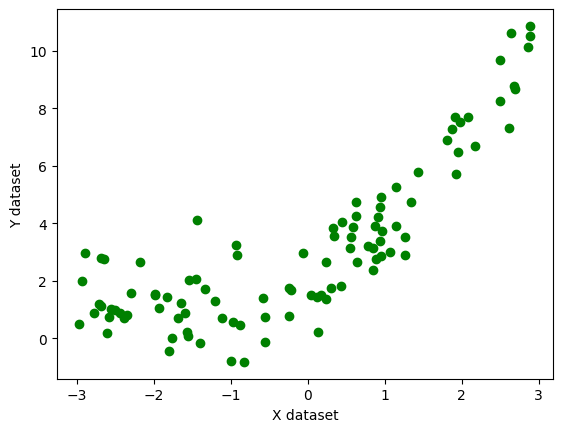

In [4]:
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# quadratic equation used- y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
## Lets implement Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [7]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression.predict(X_test))
print(score)

0.4482854957605904


Text(0, 0.5, 'Y')

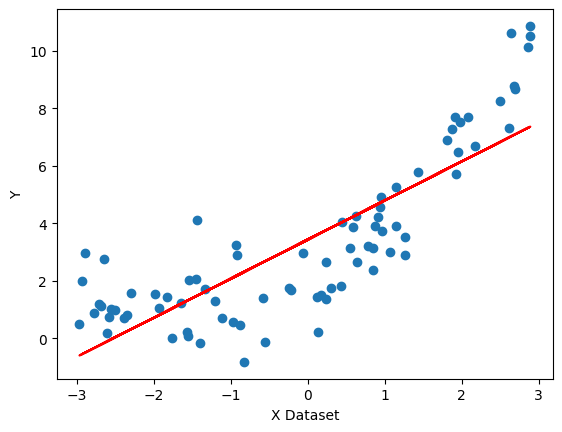

In [8]:
## Lets visualize this model
plt.plot(X_train,regression.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")

In [9]:
# Lets apply ploynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [11]:
X_train_poly

array([[ 1.00000000e+00,  4.40111961e-01,  1.93698538e-01],
       [ 1.00000000e+00,  1.91364867e+00,  3.66205123e+00],
       [ 1.00000000e+00,  9.70165122e-01,  9.41220363e-01],
       [ 1.00000000e+00, -1.11492537e+00,  1.24305858e+00],
       [ 1.00000000e+00,  2.61844020e+00,  6.85622906e+00],
       [ 1.00000000e+00, -2.70586008e+00,  7.32167878e+00],
       [ 1.00000000e+00,  1.15196904e+00,  1.32703266e+00],
       [ 1.00000000e+00, -2.77496786e+00,  7.70044662e+00],
       [ 1.00000000e+00,  1.14015681e+00,  1.29995755e+00],
       [ 1.00000000e+00,  1.34185004e-01,  1.80056153e-02],
       [ 1.00000000e+00, -2.35051081e+00,  5.52490109e+00],
       [ 1.00000000e+00,  1.97626876e+00,  3.90563822e+00],
       [ 1.00000000e+00, -8.73945524e-01,  7.63780779e-01],
       [ 1.00000000e+00, -8.33156273e-01,  6.94149376e-01],
       [ 1.00000000e+00, -2.20976340e-01,  4.88305428e-02],
       [ 1.00000000e+00, -1.43715688e+00,  2.06541989e+00],
       [ 1.00000000e+00, -5.77723581e-01

In [12]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
print(r2_score(y_test,y_pred))

0.8030562456933507


In [14]:
print(regression.coef_)
print(regression.intercept_)

[[0.         1.46368025 0.46623686]]
[2.01464348]


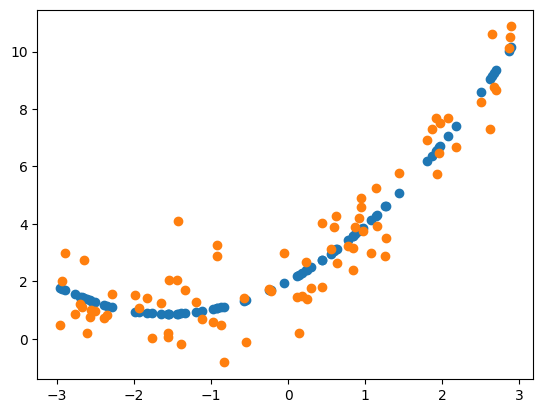

In [16]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [17]:
poly = PolynomialFeatures(degree=3,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [18]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
print(r2_score(y_test,y_pred))

0.7941285842782991


In [19]:
# Prediction of new data set
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)

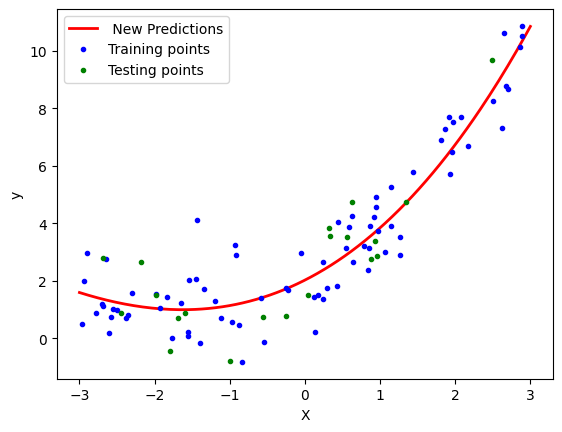

In [20]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [21]:
from sklearn.pipeline import Pipeline


In [ ]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

: 